# Live Stock Data Analysis

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import yfinance as yf
from datetime import datetime

In [38]:
# Define the stock symbol (e.g., Apple Inc. is 'AAPL')
stock_symbol = 'NFLX'

# Fetch live data for the specified stock symbol
stock_data = yf.download(stock_symbol)
df = pd.DataFrame(stock_data)

[*********************100%%**********************]  1 of 1 completed


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5357 entries, 2002-05-23 to 2023-09-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5357 non-null   float64
 1   High       5357 non-null   float64
 2   Low        5357 non-null   float64
 3   Close      5357 non-null   float64
 4   Adj Close  5357 non-null   float64
 5   Volume     5357 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 293.0 KB


In [40]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-28,418.040009,419.829987,413.269989,418.059998,418.059998,2928600
2023-08-29,416.000000,432.170013,414.500000,429.989990,429.989990,4486700
2023-08-30,430.850006,438.160004,428.350006,434.670013,434.670013,3625400
2023-08-31,431.230011,437.149994,431.230011,433.679993,433.679993,3803000
2023-09-01,437.730011,445.500000,435.929993,439.880005,439.880005,4792100


In [41]:
sns.set(rc={'figure.figsize' : (10,5)})

In [42]:
#Volume of stock traded

Text(0.5, 1.0, 'Volume of stock versus time')

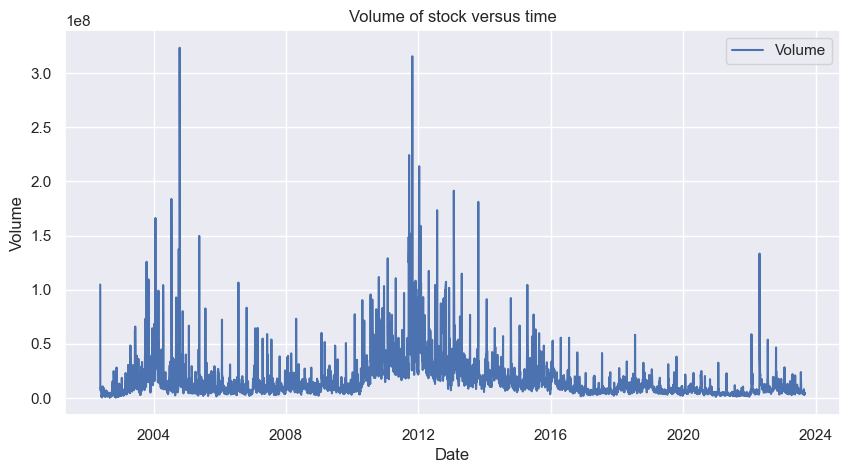

In [43]:
sns.lineplot(x=df.index, y = df['Volume'], label = 'Volume')
plt.title('Volume of stock versus time')

In [44]:
#Netflix stock price - High,open, close

<Axes: title={'center': 'NFLX Live Stock Price'}, xlabel='Date'>

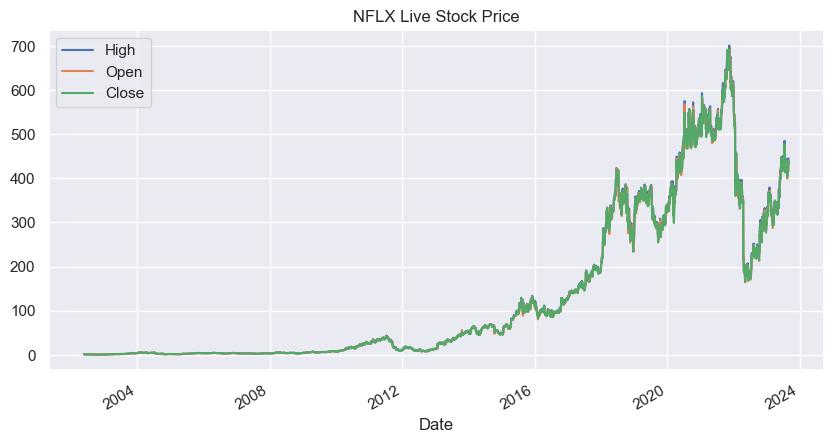

In [45]:
df.plot(y=['High','Open','Close'], title = f"{stock_symbol} Live Stock Price")

In [46]:
#NEtflix Stock Price - Day, Month, Year

<Axes: xlabel='Year'>

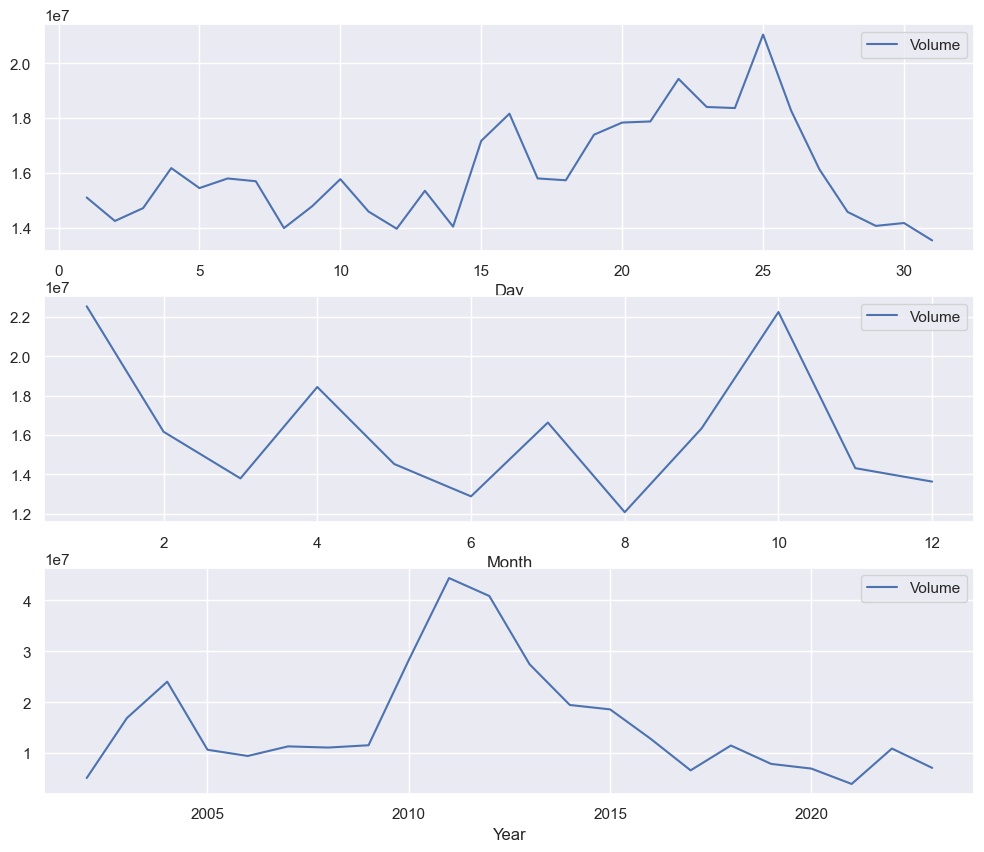

In [47]:
fig, (ax1,ax2,ax3) = plt.subplots(3, figsize = (12,10))
df.groupby(df.index.day).mean().plot(y = 'Volume', ax = ax1, xlabel ='Day')
df.groupby(df.index.month).mean().plot(y = 'Volume', ax = ax2, xlabel ='Month')
df.groupby(df.index.year).mean().plot(y = 'Volume', ax = ax3, xlabel ='Year')


In [48]:
#Top -5 Dates with Highest Stock Price

In [49]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [50]:
a=df.sort_values(by = 'High', ascending = False).head(5)
a['High']

Date
2021-11-17    700.989990
2021-11-19    694.159973
2021-11-18    691.739990
2021-10-29    690.969971
2021-11-01    689.969971
Name: High, dtype: float64

In [51]:
b=df.sort_values(by = 'Low', ascending = True).head(5)
b['Low']

Date
2002-10-10    0.346429
2002-10-09    0.347143
2002-10-07    0.382143
2002-10-08    0.390714
2002-10-16    0.442857
Name: Low, dtype: float64

<Axes: xlabel='Date', ylabel='Low'>

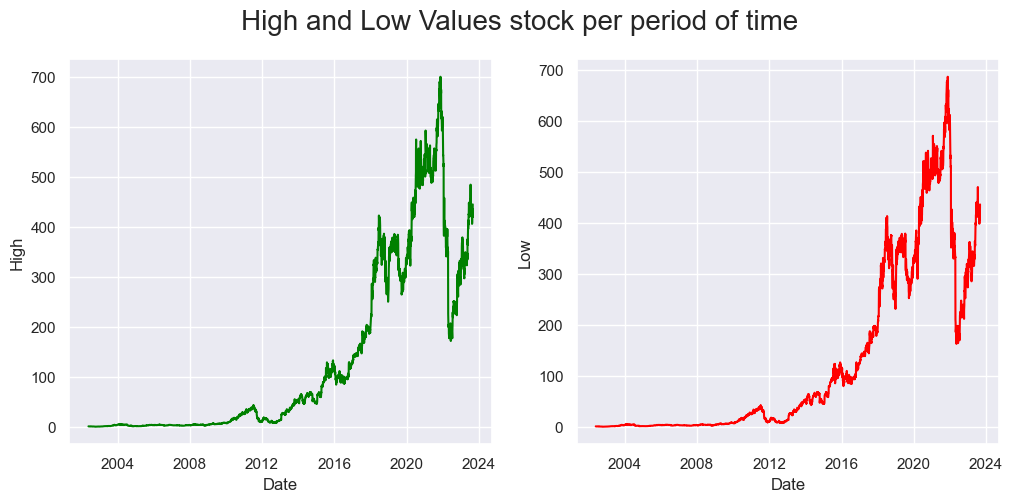

In [52]:
fig, axes = plt.subplots(nrows = 1, ncols =2, sharex = True, figsize =(12,5))
fig.suptitle('High and Low Values stock per period of time', fontsize = 20)
sns.lineplot(ax =axes[0], y = df['High'], x= df.index, color = 'green')
sns.lineplot(ax =axes[1], y = df['Low'], x= df.index, color = 'red')
